In [1]:
#!pip install pmdarima

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from pmdarima.arima import ndiffs, nsdiffs
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline
# Set Pandas option to display all columns
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data/full_table_DS.csv', sep = ';', encoding = 'utf-8')

In [5]:
df.head()

,id_yearweek,date,value_sales,sell_price,event,Category,Department,Product,Region,Store,yearweek
0,ACCESORIES_1_009_NYC_1_201105,2011-01-31,7,2.07,NoEvent,ACCESORIES,1,9,NYC,1,201105
1,ACCESORIES_1_010_NYC_1_201105,2011-01-31,1,4.22,NoEvent,ACCESORIES,1,10,NYC,1,201105
2,ACCESORIES_1_016_NYC_1_201105,2011-01-31,3,0.93,NoEvent,ACCESORIES,1,16,NYC,1,201105
3,ACCESORIES_1_022_NYC_1_201105,2011-01-31,1,9.12,NoEvent,ACCESORIES,1,22,NYC,1,201105
4,ACCESORIES_1_029_NYC_1_201105,2011-01-31,3,9.90,NoEvent,ACCESORIES,1,29,NYC,1,201105


In [6]:
df['product_store'] = df['id_yearweek'].str.slice(stop=-7)

In [7]:
# Converter a coluna 'date' para o tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar o DataFrame de forma descendente por 'date'
df_sorted = df.sort_values(by='date', ascending=False)

# Seleção da Região e Categoria

In [8]:
df_sorted['Category'].unique()

array(['SUPERMARKET', 'HOME&GARDEN', 'ACCESORIES'], dtype=object)

In [9]:
df_sorted['Region'].unique()

array(['NYC', 'BOS', 'PHI'], dtype=object)

In [10]:
var1 = 'BOS'
var2 = 'ACCESORIES'

In [25]:
df_grouped = df_sorted[df_sorted['date'].dt.year >= 2015]
df_grouped = df_grouped.query(f"Region=='{var1}' & Category=='{var2}'").reset_index()

In [27]:
df_grouped.head()

,index,id_yearweek,date,value_sales,sell_price,event,Category,Department,Product,Region,Store,yearweek,product_store
0,18431840,ACCESORIES_2_147_BOS_3_201616,2016-04-24,1,1.29,NoEvent,ACCESORIES,2,147,BOS,3,201616,ACCESORIES_2_147_BOS_3
1,18431829,ACCESORIES_2_050_BOS_3_201616,2016-04-24,1,2.62,NoEvent,ACCESORIES,2,50,BOS,3,201616,ACCESORIES_2_050_BOS_3
2,18431830,ACCESORIES_2_054_BOS_3_201616,2016-04-24,3,5.28,NoEvent,ACCESORIES,2,54,BOS,3,201616,ACCESORIES_2_054_BOS_3
3,18431831,ACCESORIES_2_058_BOS_3_201616,2016-04-24,1,0.66,NoEvent,ACCESORIES,2,58,BOS,3,201616,ACCESORIES_2_058_BOS_3
4,18431832,ACCESORIES_2_063_BOS_3_201616,2016-04-24,1,1.29,NoEvent,ACCESORIES,2,63,BOS,3,201616,ACCESORIES_2_063_BOS_3


In [28]:
# Agrupar os valores de 'value_sales' por 'date' e somar, renomeando a coluna resultante para 'value'
serie_soma_value = df_grouped.groupby('date')['value_sales'].sum().reset_index(name='value')

In [29]:
# Definir 'date' como índice

serie_soma_value.set_index('date', inplace=True)

In [30]:
# kpss test

ndiffs(serie_soma_value, test='kpss')

1

In [31]:
# augmented dickey-fuller

ndiffs(serie_soma_value, test='adf')

0

In [32]:
# testes para sazonalidade

nsdiffs(serie_soma_value, test='ocsb', m=12)

0

In [33]:
nsdiffs(serie_soma_value, test='ch', m=12)

0

In [34]:
# Agora, vamos agrupar os dados diários em uma série temporal de vendas diárias

time_series = serie_soma_value['value'].resample('D').sum()

In [35]:
time_series.head()

date
2015-01-01     603
2015-01-02    1095
2015-01-03     882
2015-01-04     932
2015-01-05     803
Freq: D, Name: value, dtype: int64

# modelo ARIMA

In [36]:
# Aqui, estou usando ARIMA(0,0,1) como exemplo
order = (0, 0, 1)
model = ARIMA(time_series, order=order)

# Ajuste do modelo aos dados
model_fit = model.fit()

# Previsão dos próximos 28 dias
forecast = model_fit.forecast(steps=28)

# Imprimir as previsões
print("Previsões para os próximos 28 dias:")
print(forecast)

Previsões para os próximos 28 dias:
2016-04-25    1094.260220
2016-04-26    1013.781385
2016-04-27    1013.781385
2016-04-28    1013.781385
2016-04-29    1013.781385
2016-04-30    1013.781385
2016-05-01    1013.781385
2016-05-02    1013.781385
2016-05-03    1013.781385
2016-05-04    1013.781385
2016-05-05    1013.781385
2016-05-06    1013.781385
2016-05-07    1013.781385
2016-05-08    1013.781385
2016-05-09    1013.781385
2016-05-10    1013.781385
2016-05-11    1013.781385
2016-05-12    1013.781385
2016-05-13    1013.781385
2016-05-14    1013.781385
2016-05-15    1013.781385
2016-05-16    1013.781385
2016-05-17    1013.781385
2016-05-18    1013.781385
2016-05-19    1013.781385
2016-05-20    1013.781385
2016-05-21    1013.781385
2016-05-22    1013.781385
Freq: D, Name: predicted_mean, dtype: float64


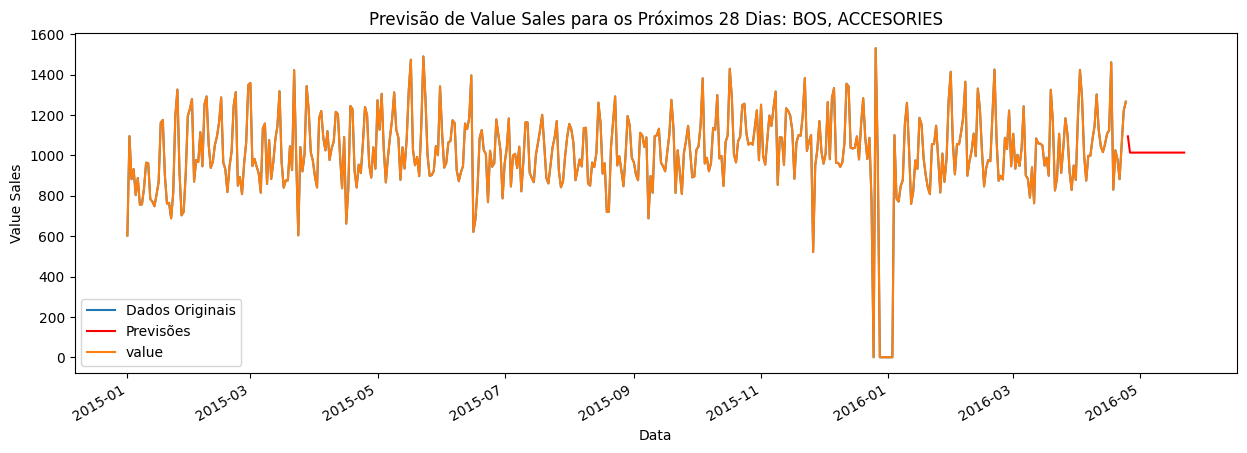

In [37]:
# Plote os dados originais
plt.plot(time_series, label='Dados Originais')

# Plote as previsões
plt.plot(model_fit.forecast(steps=28), label='Previsões', color='red')

# Configurar o tamanho da figura (largura x altura)
time_series.plot(figsize=(15, 5))

# Adicione legendas e rótulos
plt.xlabel('Data')
plt.ylabel('Value Sales')
plt.title(f'Previsão de Value Sales para os Próximos 28 Dias: {var1}, {var2}')
plt.legend()

# Exiba o gráfico
plt.show()

In [38]:
time_series.head()

date
2015-01-01     603
2015-01-02    1095
2015-01-03     882
2015-01-04     932
2015-01-05     803
Freq: D, Name: value, dtype: int64

In [39]:
# divisao entre treino e validacao
from sklearn.model_selection import train_test_split

train, test = train_test_split(serie_soma_value, shuffle=False, test_size=0.2)

In [40]:
import pmdarima as pm

model = pm.auto_arima(train, m=4, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=4801.984, Time=1.76 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=5014.526, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=4962.938, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=4855.779, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=5012.530, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=inf, Time=3.22 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=4799.697, Time=2.89 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=4803.303, Time=1.01 sec
 ARIMA(2,1,2)(2,0,0)[4] intercept   : AIC=4801.586, Time=2.14 sec
 ARIMA(2,1,2)(2,0,1)[4] intercept   : AIC=4782.170, Time=2.49 sec
 ARIMA(2,1,2)(2,0,2)[4] intercept   : AIC=4710.765, Time=2.86 sec
 ARIMA(2,1,2)(1,0,2)[4] intercept   : AIC=4806.303, Time=4.02 sec
 ARIMA(1,1,2)(2,0,2)[4] intercept   : AIC=4823.578, Time=3.83 sec
 ARIMA(2,1,1)(2,0,2)[4] intercept   : AIC=inf, Time=3.00 sec
 ARIMA(3,1,2)(2,0,2)[4] intercept   : AIC=4

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  377
Model:             SARIMAX(3, 1, 1)x(2, 0, [1, 2], 4)   Log Likelihood               -2342.496
Date:                                Thu, 16 May 2024   AIC                           4702.991
Time:                                        11:31:25   BIC                           4738.358
Sample:                                             0   HQIC                          4717.031
                                                - 377                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1036      0.069     -1.492      0.136      -0.240       0.032
ar.L2         -0.1575      0.069     -2.288      0.022      -0.292      -0.023
ar.L3         -0.0135      0.062     -0.217      0.828      -0.135       0.108
ma.L1         -0.8305      0.054    -15.352      0.000      -0.937      -0.724
ar.S.L4       -1.7968      0.004   -503.142      0.000      -1.804      -1.790
ar.S.L8       -0.9967      0.002   -404.816      0.000      -1.002      -0.992
ma.S.L4        1.7469      0.029     60.593      0.000       1.690       1.803
ma.S.L8        0.9223      0.028     33.039      0.000       0.868       0.977
sigma2      1.426e+04    869.012     16.410      0.000    1.26e+04     1.6e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                39.79
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.31
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

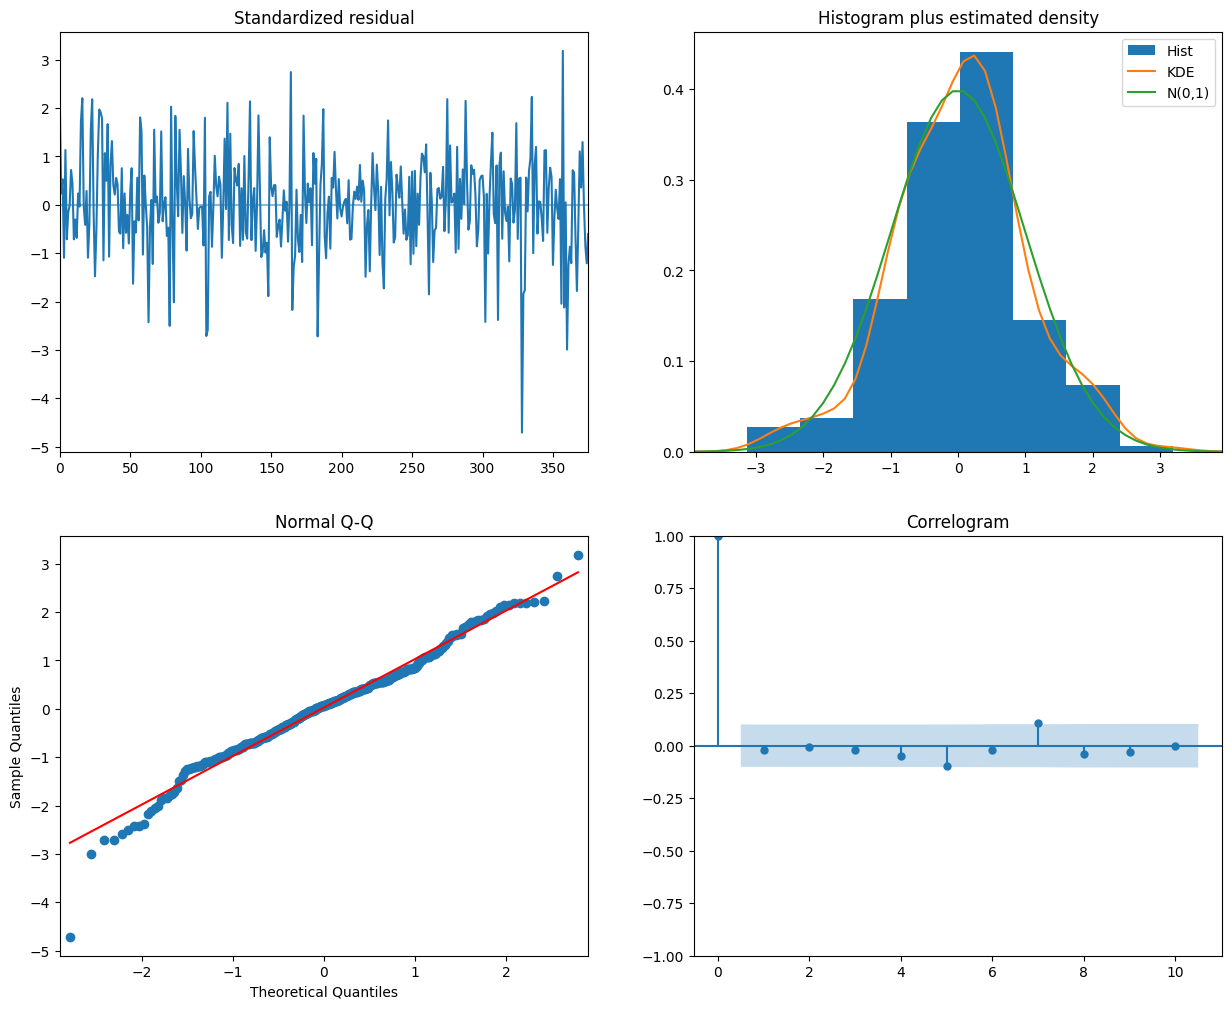

In [42]:
plot=model.plot_diagnostics(figsize=(15, 12))

In [43]:
forecasts = model.predict(95)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [44]:
train

,value
date,
2015-01-01,603
2015-01-02,1095
2015-01-03,882
2015-01-04,932
2015-01-05,803
...,...
2016-01-16,1186
2016-01-17,1153
2016-01-18,985


In [45]:
forecasts

377     832.509422
378     952.649985
379     979.926052
380    1052.711392
381    1088.571347
          ...     
467     905.269498
468     911.561301
469     916.108371
470    1080.234243
471    1059.923076
Length: 95, dtype: float64

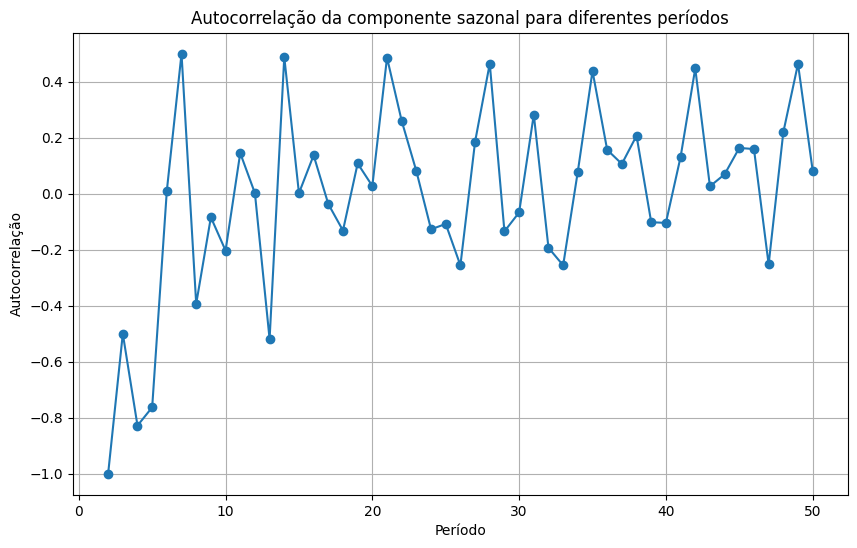

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Supondo que 'train' seja um DataFrame do pandas com uma coluna chamada 'value' que contém os seus dados

# Realize a análise de decomposição sazonal para diferentes períodos
max_period = 50  # Período máximo a ser testado
results = {}
for period in range(1, max_period + 1):
    result = seasonal_decompose(train['value'], model='additive', period=period)
    seasonal = result.seasonal
    seasonal = seasonal.dropna()
    autocorr = seasonal.autocorr()
    results[period] = autocorr

# Plot da autocorrelação para diferentes períodos
plt.figure(figsize=(10, 6))
plt.plot(results.keys(), results.values(), marker='o', linestyle='-')
plt.title('Autocorrelação da componente sazonal para diferentes períodos')
plt.xlabel('Período')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()


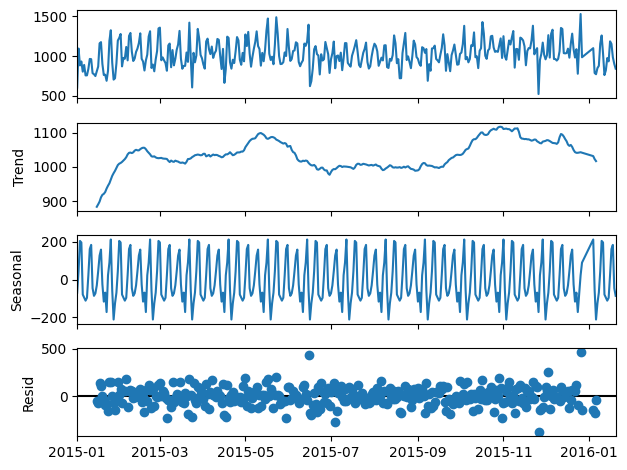

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train,
                            model='additive',
                            period=28)

plt = result.plot()

# Avaliação do modelo

In [48]:
from sklearn.metrics import mean_absolute_error

y_true = test['value']
y_pred = forecasts

mae = mean_absolute_error(y_true, y_pred)
print(mae)

125.12395284793146


In [65]:
from sklearn.metrics import mean_squared_error

y_true = test['value']
y_pred = forecasts

mae = mean_squared_error(y_true, y_pred)
print(mae)

23592.817236565614


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
def error_score(y_test, y_pred):
    test_r2 = r2_score(y_test, y_pred)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)

    print("R2: {}".format(test_r2))
    print("MAE: {}".format(test_mae))
    print("MAPE: {}".format(test_mape))
    print("MSE: {}".format(test_mse))
    print("RMSE: {}".format(test_rmse))

In [67]:
y_true = test['value']
y_pred = forecasts
error_score(y_true, y_pred)

R2: 0.021416335543252396
MAE: 125.12395284793146
MAPE: 0.11528870687581994
MSE: 23592.817236565614
RMSE: 153.59953527457566


"Quando o resultado do teste KPSS é 1, isso indica que a série é estacionária, ou seja, não possui tendência ou padrões sistemáticos ao longo do tempo. Isso significa que a média, a variância e a autocovariância da série não mudam significativamente com o tempo. Em resumo, um resultado de 1 no teste KPSS sugere que a série é estacionária em torno de uma constante."

In [58]:
# heterocedastidade
from heteroskedasticity import het_tests

p_value = het_tests(serie_soma_value, test='white')
# p_value = het_tests(series, test='breuschpagan')

p_value

0.05930712157103781

<Axes: xlabel='date'>

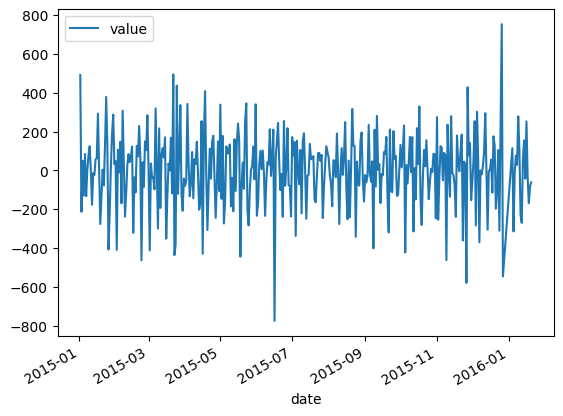

In [55]:
# removendo a tendencia
train.diff(periods=1).plot()

<Axes: xlabel='date'>

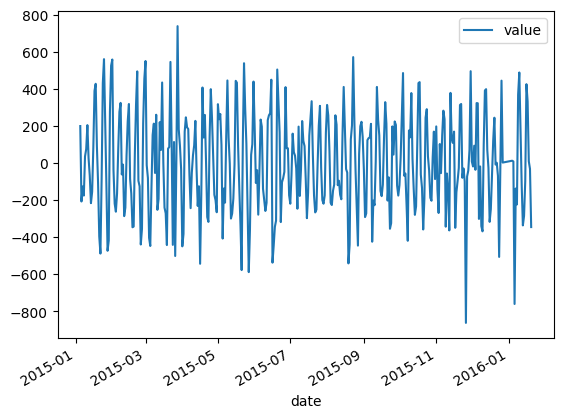

In [56]:
# removendo a sazonalidade
train.diff(periods=4).plot()

<Axes: xlabel='date'>

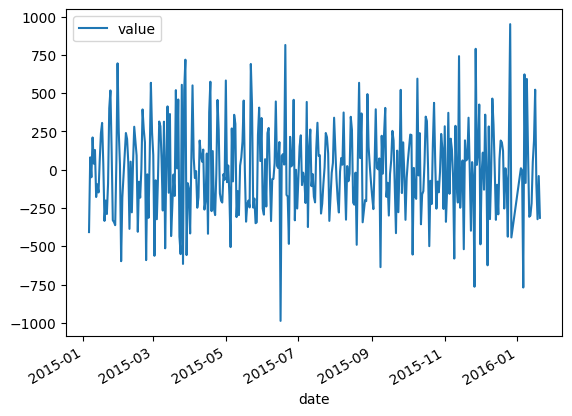

In [57]:
# residuos
train.diff(periods=1).diff(periods=4).plot()